In [1]:
import numpy as np
from numba import jit
from pysheds.grid import Grid
import matplotlib.pyplot as plt
from IPython.display import Image

plt.style.use('default')

In [2]:
@jit(nopython=True)
def quiver_direction(flow_dir):
    xy_dir = []
    for x in range(0, flow_dir.shape[0]):
        for y in range(0, flow_dir.shape[1]):
            if flow_dir[x, y] == 1:
                xy_dir.append((x, y, 1, 0))
            elif flow_dir[x, y] == 2:
                xy_dir.append((x, y, 1, -1))
            elif flow_dir[x, y] == 4:
                xy_dir.append((x, y, 0, -1))
            elif flow_dir[x, y] == 8:
                xy_dir.append((x, y, -1, -1))
            elif flow_dir[x, y] == 16:
                xy_dir.append((x, y, -1, 0))
            elif flow_dir[x, y] == 32:
                xy_dir.append((x, y, -1, 1)) 
            elif flow_dir[x, y] == 64:
                xy_dir.append((x, y, 0, 1))
            elif flow_dir[x, y] == 128:
                xy_dir.append((x, y, 1, 1))       
    return np.array(xy_dir)

In [3]:
def colorize_fdir(flow_dir):
    out_array = np.zeros([flow_dir.shape[0], flow_dir.shape[1], 3], dtype=np.uint8)
    for x in range(0, flow_dir.shape[0]):
        for y in range(0, flow_dir.shape[1]):
            if flow_dir[x, y] == 1:
                out_array[x, y, 0] = 67
                out_array[x, y, 1] = 187
                out_array[x, y, 2] = 0
            elif flow_dir[x, y] == 2:
                out_array[x, y, 0] = 0
                out_array[x, y, 1] = 125
                out_array[x, y, 2] = 59
            elif flow_dir[x, y] == 4:
                out_array[x, y, 0] = 158
                out_array[x, y, 1] = 212
                out_array[x, y, 2] = 255
            elif flow_dir[x, y] == 8:
                out_array[x, y, 0] = 0
                out_array[x, y, 1] = 166
                out_array[x, y, 2] = 255
            elif flow_dir[x, y] == 16:
                out_array[x, y, 0] = 0
                out_array[x, y, 1] = 134
                out_array[x, y, 2] = 208
            elif flow_dir[x, y] == 32:
                out_array[x, y, 0] = 204
                out_array[x, y, 1] = 153
                out_array[x, y, 2] = 255
            elif flow_dir[x, y] == 64:
                out_array[x, y, 0] = 238
                out_array[x, y, 1] = 71
                out_array[x, y, 2] = 18
            elif flow_dir[x, y] == 128:
                out_array[x, y, 0] = 255
                out_array[x, y, 1] = 178
                out_array[x, y, 2] = 0
    return out_array

In [4]:
def get_fdir_colors(flow_dir):
    colors = []
    for x in range(0, flow_dir.shape[0]):
        for y in range(0, flow_dir.shape[1]):
            if flow_dir[x, y] == 1:
                colors.append((67/255, 187/255, 0.0))
            elif flow_dir[x, y] == 2:
                colors.append((0.0, 125/255, 59/255))
            elif flow_dir[x, y] == 4:
                colors.append((158/255, 212/255, 1.0))
            elif flow_dir[x, y] == 8:
                colors.append((0.0, 166/255, 1.0))
            elif flow_dir[x, y] == 16:
                colors.append((0.0, 134/255, 208/255))
            elif flow_dir[x, y] == 32:
                colors.append((204/255, 153/255, 1.0))
            elif flow_dir[x, y] == 64:
                colors.append((238/255, 71/255, 18/255))
            elif flow_dir[x, y] == 128:
                colors.append((1.0, 178/255, 0.0))
    return colors

In [5]:
# Input raster
input_dem = r"..\Data\N46E009.hgt"

In [6]:
# Load the raster
grid = Grid.from_raster(input_dem, data_name="dem")

In [7]:
# DEM conditioning

# Fill depressions 
grid.fill_depressions(data="dem", out_name="filled_dem")

# Resolve Flats
grid.resolve_flats(data="filled_dem", out_name="inflated_dem")

In [8]:
# The coding of the direction of flow
Image(url= "https://pro.arcgis.com/en/pro-app/latest/tool-reference/spatial-analyst/GUID-A541AFD3-922C-41DA-952C-0D4524F85B39-web.gif")

In [9]:
# Compute flow directions
dir_map = [64, 128, 1, 2, 4, 8, 16, 32]
grid.flowdir(data="inflated_dem", out_name="dir", dirmap=dir_map)

In [10]:
# Get flow direction as numpy array
flow_dir = np.array(grid.dir)[400:500, 400:500]

In [11]:
# Get quiver direction
quiv_dir = quiver_direction(flow_dir)

In [12]:
# Colorize flow direction
colorized_fdir = colorize_fdir(flow_dir.T)

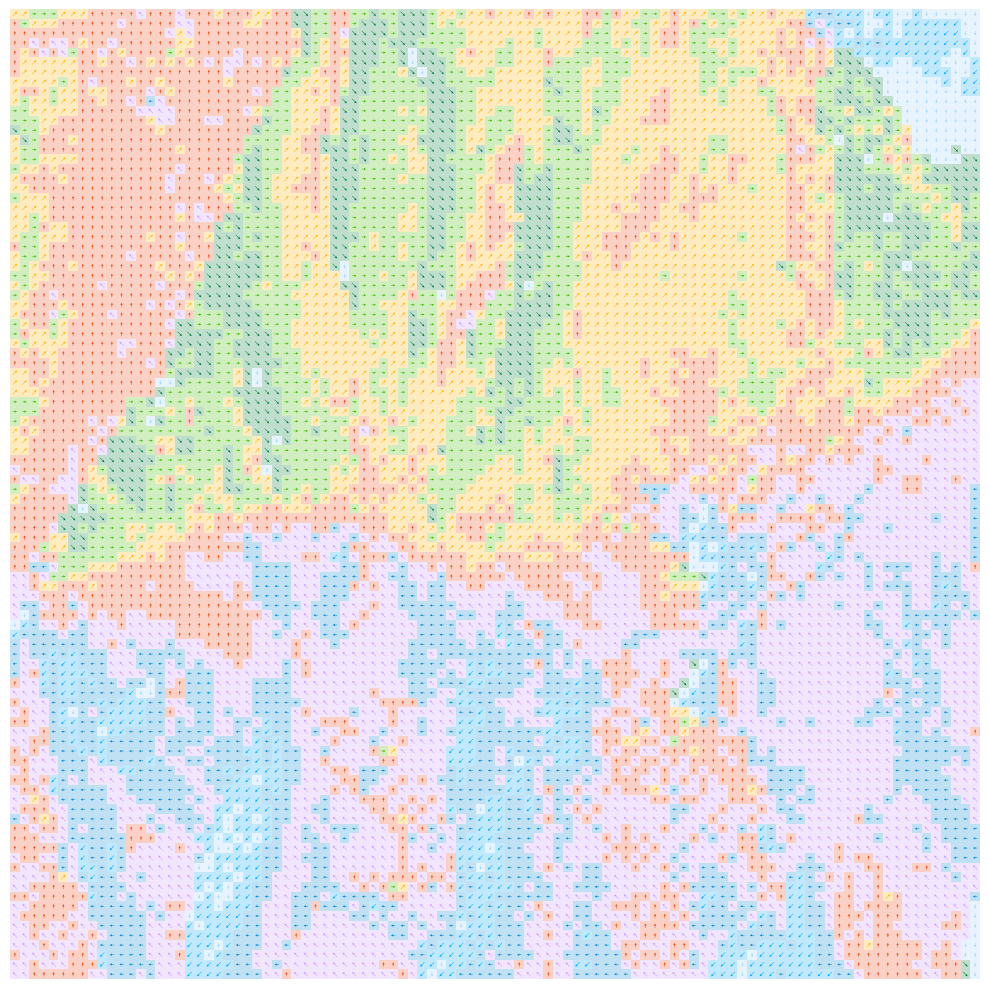

In [13]:
# Plot the result
fig, ax = plt.subplots(figsize=(10, 10))
fdir_colors = get_fdir_colors(flow_dir)
ax.quiver(quiv_dir[:, 0], quiv_dir[:, 1], quiv_dir[:, 2], quiv_dir[:, 3], 
          color=fdir_colors, pivot="middle", headlength=5, headwidth=5, width=0.0005)
plt.imshow(colorized_fdir, alpha=0.25)
plt.axis("off")
plt.tight_layout()
plt.savefig("02_Lines.png", dpi=300)
plt.show()